## Customized visualization
The usage of Open3D convenient visualization functions **draw_geometries** and **draw_geometries_with_custom_animation** is straightforward. Everything can be done with the GUI. Press **h** inside the visualizer window to see helper information.

This tutorial focuses on more advanced functionalities to customize the behavior of the visualizer window.

### Mimic draw_geometries() with Visualizer class

In [17]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def custom_draw_geometry(pcd):
    # The following code achieves the same effect as:
    # o3d.visualization.draw_geometries([pcd])
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(pcd)
    vis.run()
    vis.destroy_window()

This function produces exactly the same functionality as the function **draw_geometries**.

In [3]:
pcd = o3d.io.read_point_cloud("fragment.ply")
print(pcd)

PointCloud with 196133 points.


In [4]:
custom_draw_geometry(pcd)

Class **Visualizer** has a couple of variables such as a **ViewControl** and a **RenderOption**. The following function reads a predefined **RenderOption** stored in a json file.

In [5]:
def custom_draw_geometry_load_option(pcd):
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(pcd)
    vis.get_render_option().load_from_json("Open3D/examples/test_data/renderoption.json")
    vis.run()
    vis.destroy_window()

In [6]:
custom_draw_geometry_load_option(pcd)

>   -- Mouse view control --
> -    Left button + drag         : Rotate.
> -    Ctrl + left button + drag  : Translate.
> -    Wheel button + drag        : Translate.
> -    Shift + left button + drag : Roll.
> -    Wheel                      : Zoom in/out.
> 
> -  -- Keyboard view control --
> -    \[/\]          : Increase/decrease field of view.
> -    R            : Reset view point.
> -    Ctrl/Cmd + C : Copy current view status into the clipboard.
> -    Ctrl/Cmd + V : Paste view status from clipboard.
> - 
> -  -- General control --
> -    Q, Esc       : Exit window.
> -    H            : Print help message.
> -    P, PrtScn    : Take a screen capture.
> -    D            : Take a depth capture.
> -    O            : Take a capture of current rendering settings.
> -    Alt + Enter  : Toggle between full screen and windowed mode.
> -
> -  -- Render mode control --
> -    L            : Turn on/off lighting.
> -    +/-          : Increase/decrease point size.
> -    Ctrl + +/-   : Increase/decrease width of geometry::LineSet.
> -    N            : Turn on/off point cloud normal rendering.
> -    S            : Toggle between mesh flat shading and smooth shading.
> -    W            : Turn on/off mesh wireframe.
> -    B            : Turn on/off back face rendering.
> -    I            : Turn on/off image zoom in interpolation.
> -    T            : Toggle among image render:
> -                   no stretch / keep ratio / freely stretch.
> -
> -  -- Color control --
> -    0..4,9       : Set point cloud color option.
> -                   0 - Default behavior, render point color.
> -                   1 - Render point color.
> -                   2 - x coordinate as color.
> -                   3 - y coordinate as color.
> -                   4 - z coordinate as color.
> -                   9 - normal as color.
> -    Ctrl + 0..4,9: Set mesh color option.
> -                   0 - Default behavior, render uniform gray color.
> -                   1 - Render point color.
> -                   2 - x coordinate as color.
> -                   3 - y coordinate as color.
> -                   4 - z coordinate as color.
> -                   9 - normal as color.
> -    Shift + 0..4 : Color map options.
> -                   0 - Gray scale color.
> -                   1 - JET color map.
> -                   2 - SUMMER color map.
> -                   3 - WINTER color map.
> -                   4 - HOT color map.

### Change field of view
To change FOV of the camera, it is first necessary to get an instance of the visualizer control. To modify the FOV, use **change_field_of_view**.

In [7]:
def custom_draw_geometry_with_custom_fov(pcd, fov_step):
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(pcd)
    ctr = vis.get_view_control()
    print(f'FOV (before changing) {ctr.get_field_of_view():.2f}')
    ctr.change_field_of_view(step=fov_step)
    print(f'FOV (after changing) {ctr.get_field_of_view():.2f}')
    vis.run()
    vis.destroy_window()

In [9]:
custom_draw_geometry_with_custom_fov(pcd, 15)

FOV (before changing) 60.00
FOV (after changing) 90.00


The field of view(FOV) can be set to a degree in the range**\[5, 90\]**. Note that **change_field_of_view** adds the specified FoV to the current FoV. By default, the visualizer has an FoV of 60 degrees.

In [11]:
custom_draw_geometry_with_custom_fov(pcd, 10.0) # can not see any change

FOV (before changing) 60.00
FOV (after changing) 90.00


### Callback functions
Function **draw_geometries_with_animation_callback** registers a Python callback function **rotate_view** as the idle functions of the main loop. It rotates the view along the x-axis whenever the visualizer is idle. This defines an animation behavior.

In [12]:
def custom_draw_geometry_with_rotation(pcd):
    def rotate_view(vis):
        ctr = vis.get_view_control()
        ctr.rotate(10.0, 0.0)
        return False

    o3d.visualization.draw_geometries_with_animation_callback([pcd], rotate_view)

In [13]:
custom_draw_geometry_with_rotation(pcd)

In [23]:
def custom_draw_geometry_with_key_callback(pcd):
    def change_background_to_black(vis):
        opt = vis.get_render_option()
        opt.background_color = np.asarray([0, 0, 0])
        return False

    def load_render_option(vis):
        vis.get_render_option().load_from_json("Open3D/examples/test_data/renderoption.json")
        return False

    def capture_depth(vis):
        depth = vis.capture_depth_float_buffer()
        plt.imshow(np.asarray(depth))
        plt.show()
        return False

    def capture_image(vis):
        image = vis.capture_screen_float_buffer()
        plt.imshow(np.asarray(image))
        plt.show()
        return False

    key_to_callback = {}
    key_to_callback[ord("K")] = change_background_to_black
    key_to_callback[ord("R")] = load_render_option
    key_to_callback[ord(",")] = capture_depth
    key_to_callback[ord('.')] = capture_image
    #print(key_to_callback)
    o3d.visualization.draw_geometries_with_key_callbacks([pcd], key_to_callback)

Callback functions can also be registered upon key press event. This script registered four keys. For example, pressing k changes the background color to black

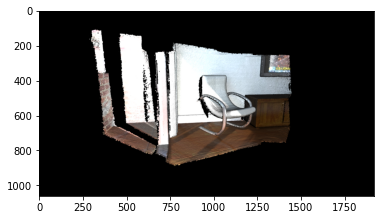

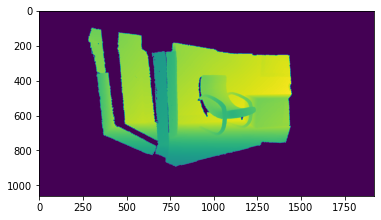

In [24]:
custom_draw_geometry_with_key_callback(pcd)

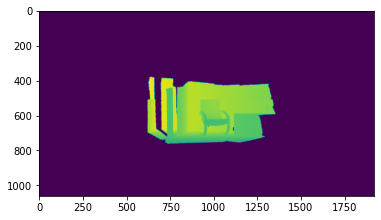

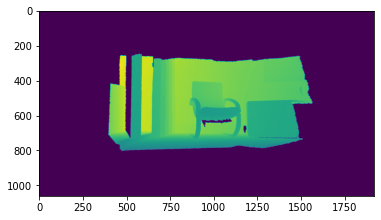

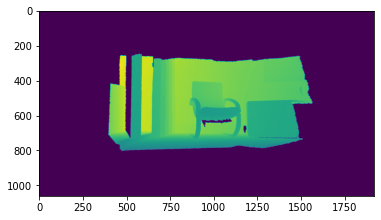

In [20]:
custom_draw_geometry_with_key_callback(pcd)

### Capture images in a customized animation

In [27]:
def custom_draw_geometry_with_camera_trajectory(pcd):
    custom_draw_geometry_with_camera_trajectory.index = -1
    custom_draw_geometry_with_camera_trajectory.trajectory = \
        o3d.io.read_pinhole_camera_trajectory(\
            "Open3D/examples/test_data/camera_trajectory.json")
    custom_draw_geometry_with_camera_trajectory.vis = o3d.visualization.Visualizer()
    if not os.path.exists('image/'):
        os.makedirs('image/')
    if not os.path.exists('depth/'):
        os.makedirs('depth/')

    def move_forward(vis):
        # This function is called within the o3d.visualization.Visualizer::run() loop
        # The run loop calls the function, then re-render
        # So the sequence in this function is to:
        # 1. Capture frame
        # 2. index++, check ending criteria
        # 3. Set camera
        # 4. (Re-render)
        ctr = vis.get_view_control()
        glb = custom_draw_geometry_with_camera_trajectory
        if glb.index >= 0:
            print(f'Capture image {glb.index:05d}')
            depth = vis.capture_depth_float_buffer(False)
            image = vis.capture_screen_float_buffer(False)
            plt.imsave(f'depth/{glb.index:05d}.png', np.asarray(depth), dpi = 1)
            plt.imsave(f'image/{glb.index:05d}.png', np.asarray(image), dpi = 1)
        glb.index = glb.index + 1
        if glb.index < len(glb.trajectory.parameters):
            ctr.convert_from_pinhole_camera_parameters(glb.trajectory.parameters[glb.index])
        else:
            custom_draw_geometry_with_camera_trajectory.vis.register_animation_callback(None)
        return False

    vis = custom_draw_geometry_with_camera_trajectory.vis
    vis.create_window()
    vis.add_geometry(pcd)
    vis.get_render_option().load_from_json("Open3D/examples/test_data/renderoption.json")
    vis.register_animation_callback(move_forward)
    vis.run()
    vis.destroy_window()

In [30]:
custom_draw_geometry_with_camera_trajectory(pcd)

[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
Capture image 00000
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
Capture image 00001
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
Capture image 00002
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
Capture image 00003
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
Capture image 00004
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
Capture image 00005
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
Capture image 00006
[Open3D WARNI

This function reads a camera trajectory, then defines an animation function **move_forward** to travel through the camera trajectory. In this animation function, both color image and depth image are captured using **Visualizer.capture_depth_float_buffer** and **Visualizer.capture_screen_float_buffer** respectively. The images are saved as png files.